In [4]:
import pandas as pd

In [2]:
fri_calls = pd.read_csv("C:/Users/igome/Documents/Smith/Spring_2021/visual analyticsd/DC2-data/DC2-data/Communication Data/comm-data-Fri.csv")
sat_calls = pd.read_csv("C:/Users/igome/Documents/Smith/Spring_2021/visual analyticsd/DC2-data/DC2-data/Communication Data/comm-data-Sat.csv")
sun_calls = pd.read_csv("C:/Users/igome/Documents/Smith/Spring_2021/visual analyticsd/DC2-data/DC2-data/Communication Data/comm-data-Sun.csv")

In [7]:
fri_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  948739 non-null  datetime64[ns]
 1   from       948739 non-null  int64         
 2   to         948739 non-null  object        
 3   location   948739 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 21.7+ MB


In [5]:
#converting Timestamp column from object to datetime 
fri_calls['Timestamp'] = pd.to_datetime(fri_calls['Timestamp'])
sat_calls['Timestamp'] = pd.to_datetime(sat_calls['Timestamp'])
sun_calls['Timestamp'] = pd.to_datetime(sun_calls['Timestamp'])

In [6]:
fri_calls.groupby([fri_calls['Timestamp'].hour, fri_calls['Timestamp'].minute]).value_col.sum()

AttributeError: 'Series' object has no attribute 'hour'

In [8]:
#data.groupby([pd.Grouper(key='created_at', freq='M'), 
              
#this will be too large, how to better group for visualization, could do a graph for 8am - 11pm by the hour   
fri_calls_count = fri_calls.groupby([pd.Grouper(key = 'Timestamp', freq = '1min')]).sum()

sat_calls_count = sat_calls.groupby([pd.Grouper(key = 'Timestamp', freq = '1min')]).sum()

sun_calls_count = sun_calls.groupby([pd.Grouper(key = 'Timestamp', freq = '1min')]).sum()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

In [9]:
fri_calls_count

,from
Timestamp,
2014-06-06 08:03:00,3592559
2014-06-06 08:04:00,12392144
2014-06-06 08:05:00,13749265
2014-06-06 08:06:00,1106999
2014-06-06 08:07:00,66599796
...,...
2014-06-06 23:21:00,1527872
2014-06-06 23:22:00,775295
2014-06-06 23:23:00,1267964


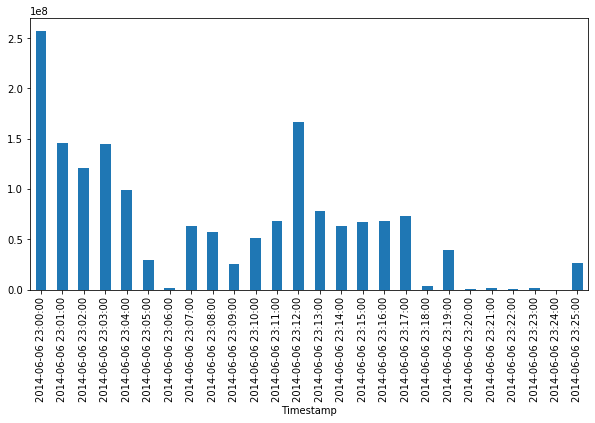

In [15]:
eleven = fri_calls_count.between_time('23:00', '23:25')
eleven.plot(kind='bar',figsize=(10,5),legend=None)

In [13]:
eleven

,from
Timestamp,
2014-06-06 23:00:00,257449667
2014-06-06 23:01:00,145435105
2014-06-06 23:02:00,120632827
2014-06-06 23:03:00,144570864
2014-06-06 23:04:00,98849896
2014-06-06 23:05:00,29427486
2014-06-06 23:06:00,1609200
2014-06-06 23:07:00,63632785
2014-06-06 23:08:00,57540579


In [19]:
sat_calls_count

,from
Timestamp,
2014-06-07 08:01:00,1003120
2014-06-07 08:02:00,6235457
2014-06-07 08:03:00,7167868
2014-06-07 08:04:00,128667478
2014-06-07 08:05:00,476354684
...,...
2014-06-07 23:31:00,972171
2014-06-07 23:32:00,744841
2014-06-07 23:33:00,55686225


In [16]:
fri_calls_count[fri_calls_count['from'] == 0]

,from
Timestamp,
2014-06-06 23:24:00,0


In [15]:
sat_calls_count[sat_calls_count['from'] == 0]

,from
Timestamp,
2014-06-07 23:22:00,0
2014-06-07 23:23:00,0
2014-06-07 23:25:00,0
2014-06-07 23:26:00,0
2014-06-07 23:27:00,0
2014-06-07 23:28:00,0
2014-06-07 23:29:00,0
2014-06-07 23:30:00,0


In [17]:
sun_calls_count[sun_calls_count['from'] == 0]

,from
Timestamp,


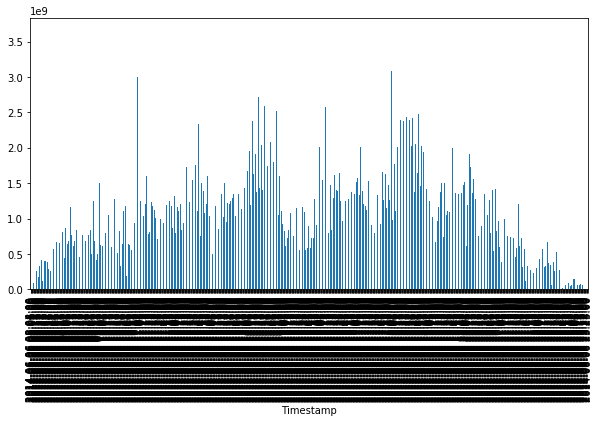

In [9]:
fri_calls_count.plot(kind='bar',figsize=(10,5),legend=None)

In [14]:
## Movement Data 
mvmt_sun = pd.read_csv("C:/Users/maype/Documents/CSC235/DC2/DATA/park-movement-Sun.csv", parse_dates=[0])


C:\Users\maype\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
#dropping last row that just repeats the column titles
mvmt_sun = mvmt_sun[0:10932425]

In [21]:
mvmt_sun

,Timestamp,id,type,X,Y
0,2014-06-08 08:00:11,1923259,check-in,0,67
1,2014-06-08 08:00:11,39012,check-in,0,67
2,2014-06-08 08:00:11,613364,check-in,0,67
3,2014-06-08 08:00:14,100951,check-in,99,77
4,2014-06-08 08:00:14,1959069,check-in,99,77
...,...,...,...,...,...
10932420,2014-06-08 23:25:13,71913,movement,63,99
10932421,2014-06-08 23:25:13,785325,movement,63,99
10932422,2014-06-08 23:25:13,791077,movement,63,99
10932423,2014-06-08 23:25:13,874286,movement,63,99


In [28]:
#converting Timestamp column from object to datetime 
mvmt_sun['Timestamp'] = pd.to_datetime(mvmt_sun['Timestamp'])
mvmt_sun['X'] = pd.to_numeric(mvmt_sun['X'])
mvmt_sun['Y'] = pd.to_numeric(mvmt_sun['Y'])

In [29]:
mvmt_sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10932425 entries, 0 to 10932424
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   id         object        
 2   type       object        
 3   X          float64       
 4   Y          float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 417.0+ MB


In [24]:
#time we're interested in, we believe the crime happened during this time. 
start_time = pd.to_datetime('2014-06-08 9:40:00')
end_time = pd.to_datetime('2014-06-08 13:00:00')

In [26]:
mvmt_sun_sus = mvmt_sun.loc[(mvmt_sun['Timestamp'] > start_time) & (mvmt_sun['Timestamp'] <end_time)]


In [30]:
mvmt_sun_sus_location = mvmt_sun_sus.loc[(mvmt_sun_sus['X'] == 32 ) & (mvmt_sun_sus['Y'] == 33)] 

In [38]:
mvmt_sun_sus_location['id'].unique()


array([1009817, 836758, 264185, ..., 23258, 251539, 2095583], dtype=object)

In [37]:
#how many unique people went into the pavillion during this time? 
len(mvmt_sun_sus_location['id'].unique())

2398

In [ ]:
#What is the average time a person spends in the Pavillion? 

